In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import os
import sys
from imusensor.filters.kalman import Kalman
# sys.path.append('/hdd/side_projects/imu_project/imusensor/imusensor/filters')
# from kalman import Kalman



In [46]:
data_folder = '/hdd/side_projects/imu_project/form-check/data_acquisition/data'

folder_name = 'completely_still_4'

# list all csv files in the data folder
csv_files = sorted([f for f in os.listdir(os.path.join(data_folder, folder_name)) if f.endswith('.csv')])

# load the first csv file
print (csv_files)

['accelerometer-20250316-163321.csv', 'gyroscope-20250316-163321.csv', 'magnetometer-20250316-163321.csv']


In [63]:
def get_roll(row):
    roll = np.arctan2(row['y'], row['z'] + 0.05*row['x'])
    return roll
def get_pitch(row):
    pitch = np.arctan2(-1*row['x'], np.sqrt(np.square(row['y']) + np.square(row['z']) ))
    return pitch

# Kalman_filter = Kalman()

def get_kalman_orientation(row, kalman_filter):
    kalman_filter.computeAndUpdateRollPitch(row['x_acc'], row['y_acc'], row['z_acc'], row['x_gyro'], row['y_gyro'], 10)
    roll = kalman_filter.roll
    pitch = kalman_filter.pitch
    return roll, pitch
# def get_pitch(row, kalman_filter):
    # kalman_filter.computeAndUpdateRollPitch(row['x_acc'], row['y_acc'], row['z_acc'], row['x_gyro'], row['y_gyro'], 10)
    # return kalman_filter.pitch

In [66]:
folder_names = ['completely_still_4', 'completely_still_5', 'completely_still_6', 'completely_still_7', 'completely_still_8', 'completely_still_9']
run_names = ['still', 'still', 'slow_speed', 'slow_speed', 'med_speed', 'high_speed']


acc_data = []
for i in range(len(folder_names)):
    folder_name = folder_names[i]
    run_name = run_names[i]
    csv_files = sorted([f for f in os.listdir(os.path.join(data_folder, folder_name)) if f.endswith('.csv') ])
    acc_df = pd.read_csv(os.path.join(os.path.join(data_folder, folder_name), csv_files[0]))
    gyro_df = pd.read_csv(os.path.join(os.path.join(data_folder, folder_name), csv_files[1]))
    mag_df = pd.read_csv(os.path.join(os.path.join(data_folder, folder_name), csv_files[2]))
    merged_df = pd.merge(acc_df, gyro_df, on='epoch', how='inner', suffixes=('_acc', '_gyro'))
    Kalman_filter = Kalman()
    # merged_df['roll'] = merged_df.apply(get_roll, Kalman_filter, axis=1)
    merged_df['roll'], merged_df['pitch'] = zip(*merged_df.apply(lambda row: get_kalman_orientation(row, Kalman_filter), axis=1))

    # merged_df['roll'], merged_df['pitch'] = merged_df.apply(get_kalman_orientation, Kalman_filter, axis=1)
    # Kalman_filter = Kalman()
    # merged_df['pitch'] = merged_df.apply(get_pitch, Kalman_filter, axis=1)
    acc_data.append(merged_df)

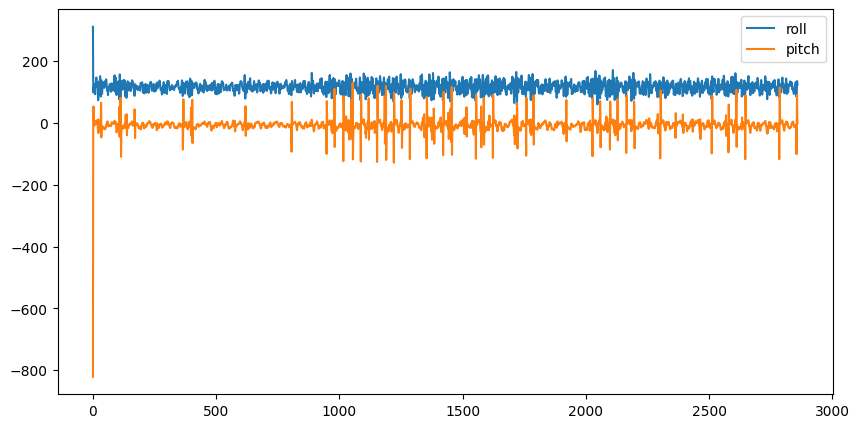

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(acc_data[5]['roll'], label='roll')
plt.plot(acc_data[5]['pitch'], label='pitch')
plt.legend()
plt.show()


In [71]:
acc_data[5].describe()


,epoch,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro,roll,pitch
count,2.860000e+03,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000
mean,1.742140e+12,0.119685,0.877661,-0.430048,0.258635,-0.130629,-0.007014,116.618557,-7.229175
std,8.334776e+03,0.255622,0.218825,0.135388,33.255261,47.140834,19.991552,16.007589,24.400720
min,1.742140e+12,-0.404785,0.241699,-0.834961,-94.512199,-121.280487,-58.109756,58.197756,-821.045980
25%,1.742140e+12,-0.093262,0.725098,-0.510254,-22.134148,-29.588416,-11.951220,106.752315,-13.607779
50%,1.742140e+12,0.076172,0.857666,-0.415527,5.609756,2.317073,1.737805,117.337924,-6.799614
75%,1.742140e+12,0.313599,1.036865,-0.336426,23.231709,29.207317,13.231708,126.659490,-0.725571
max,1.742140e+12,0.767578,1.661621,-0.064453,97.378052,109.817078,56.707317,311.095180,130.138942


In [70]:
acc_data[1].describe()

,epoch,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro,roll,pitch
count,2.854000e+03,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,1.742139e+12,0.049195,0.818761,-0.554636,0.031556,-0.003782,0.090673,124.071193,-2.845816
std,8.340151e+03,0.003875,0.002952,0.003237,0.432919,0.403179,0.333967,2.290864,0.260439
min,1.742139e+12,0.035156,0.807617,-0.565430,-1.463415,-1.341463,-1.585366,4.014204,-3.683103
25%,1.742139e+12,0.046875,0.816895,-0.557129,-0.243902,-0.243902,-0.121951,123.857431,-3.006889
50%,1.742139e+12,0.049316,0.818848,-0.554688,0.000000,0.000000,0.121951,124.106268,-2.851556
75%,1.742139e+12,0.051758,0.820801,-0.552246,0.304878,0.243902,0.304878,124.355105,-2.694867
max,1.742139e+12,0.063477,0.828613,-0.543457,2.317073,1.524390,1.585366,131.338766,2.855986


In [47]:
acc_data = pd.read_csv(os.path.join(data_folder, folder_name, csv_files[0]))
gyro_data = pd.read_csv(os.path.join(data_folder, folder_name, csv_files[1]))

print (acc_data.head())
print (gyro_data.head())

           epoch         x         y         z
0  1742139201903  0.159668  0.798340 -0.552734
1  1742139201913  0.160156  0.805176 -0.561035
2  1742139201922  0.160156  0.802734 -0.559082
3  1742139201932  0.161621  0.800781 -0.558594
4  1742139201942  0.164062  0.800781 -0.559082
           epoch         x         y         z
0  1742139201932  0.121951  0.670732 -0.121951
1  1742139201942  0.243902  1.158537 -0.243902
2  1742139201952 -0.426829  1.463415 -0.670732
3  1742139201961 -0.060976  1.524390 -0.731707
4  1742139201971 -0.182927  1.524390 -0.731707


In [48]:
# match the time stamps of the two dataframes
# as in merge(inner join ) the two dataframes on the epoch column
merged_df = pd.merge(acc_data, gyro_data, on='epoch', how='inner', suffixes=('_acc', '_gyro'))


Kalman_filter = Kalman()
def get_roll(row):
    Kalman_filter.computeAndUpdateRollPitch(row['x_acc'], row['y_acc'], row['z_acc'], row['x_gyro'], row['y_gyro'], 10)
    return Kalman_filter.roll
def get_pitch(row):
    Kalman_filter.computeAndUpdateRollPitch(row['x_acc'], row['y_acc'], row['z_acc'], row['x_gyro'], row['y_gyro'], 10)
    return Kalman_filter.pitch

merged_df['roll'] = merged_df.apply(get_roll, axis=1)
merged_df['pitch'] = merged_df.apply(get_pitch, axis=1)









    

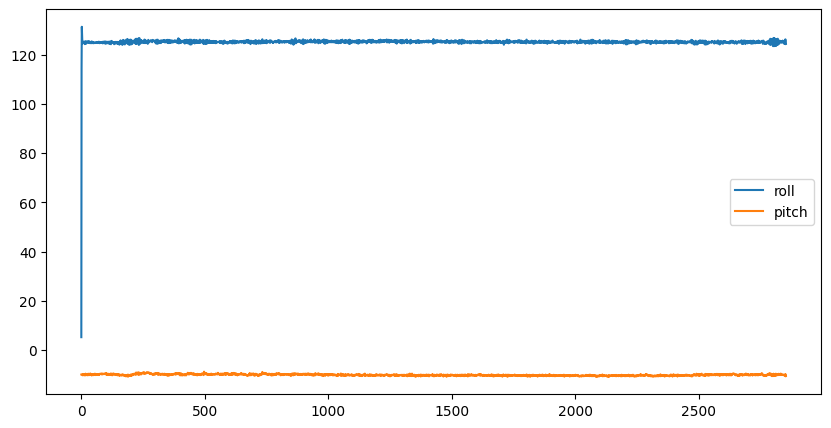

In [49]:
# plot the roll and pitch data
plt.figure(figsize=(10, 5))
plt.plot(merged_df['roll'], label='roll')
plt.plot(merged_df['pitch'], label='pitch')
plt.legend()
plt.show()


In [50]:
merged_df[['roll', 'pitch']].describe()

,roll,pitch
count,2854.000000,2854.000000
mean,125.150607,-10.126528
std,2.293093,0.311873
min,5.209145,-10.880809
25%,124.939809,-10.361339
50%,125.187476,-10.155870
75%,125.450909,-9.915318
max,131.328520,-8.799331


In [33]:
merged_df[['roll', 'pitch']].describe()

,roll,pitch
count,2852.000000,2852.000000
mean,119.281736,-6.941238
std,8.312112,5.319398
min,83.784549,-30.824732
25%,113.910153,-11.089038
50%,119.478965,-6.854798
75%,125.019584,-2.715441
max,151.262462,17.068120


In [27]:
merged_df[['roll', 'pitch']].describe()

,roll,pitch
count,2860.000000,2860.000000
mean,116.618557,-6.958043
std,16.007589,19.039327
min,58.197756,-128.735446
25%,106.752315,-13.605776
50%,117.337924,-6.794540
75%,126.659490,-0.725571
max,311.095180,130.138942


In [40]:
merged_df.to_csv('./low_speed.csv')
